## Problem Statement:

We have to consider popular Fashion MNIST dataset for this project. The dataset includes tiny images of fashion pieces. The objective is to create a set of supervised learning models that can predict the type of item based on its image. And use the same models to predict the new test images and revert with the correct lable for the image.

In [2]:
import tensorflow as tf ##checking version of tensorflow
tf.__version__

'2.10.0'

In [3]:
# Let's define all required packages first

import cv2
import numpy as np
import pandas as pd
import matplotlib as mpl
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, f1_score, recall_score, precision_score, confusion_matrix, r2_score

C:\Users\srusti\Anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


Now, it's time to load the dataset

In [4]:
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

As can be seen from the above code, the dataset was divided into train and test sets. Let's take a look at the X_train

In [5]:
X_train.shape

(60000, 28, 28)

As it is clear, the train dataset (`X_train`) contains 60,000 images of size 28 x 28. We can visualize one of the images using the following code:

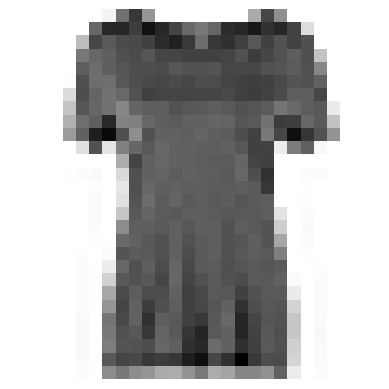

In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

sample_image = X_train[10]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

The `y_train` also includes values between 0 and 9. Each represents a particular category. For example, we can check the value of `y_train` for the above image.

In [7]:
y_train[10]

0

In [8]:
a = pd.DataFrame(y_train)

print(a.value_counts())

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
dtype: int64


The above code shows that the image belongs to category 0. To get the associated label with each category, you can use the following code:

In [9]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]])

T-shirt/top


In [10]:
X_test.shape ## Checking shape of test dataset

(10000, 28, 28)

# Dataset:
From the above line of codes we can say that the dataset includes tiny images of fashion pieces. The Data set consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes. 

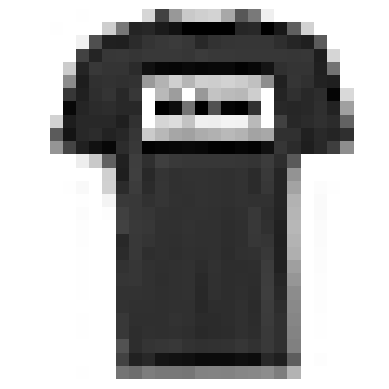

In [11]:
# Ploting the sample image from the training dataset
sample_image = X_train[1]
plt.imshow(sample_image, cmap='binary')
plt.axis('off')
plt.show()

In [12]:
y_train[10] # Checking the category of the above image

0

In [13]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
print(class_names[y_train[10]]) 

T-shirt/top


From the above code we can see that there are 10 categories for the labels and each image is associated with one of them:

- 0 &rarr; T-shirt/top

- 1 &rarr; Trouser

- 2 &rarr; Pullover

- 3 &rarr; Dress

- 4 &rarr; Coat

- 5 &rarr; Sandal

- 6 &rarr; Shirt

- 7 &rarr; Sneaker

- 8 &rarr; Bag

- 9 &rarr; Ankle boot

# Dataset Pre-Processing

Rescaling real-valued numerical attributes into a 0 to 1 range is known as normalization. Machine learning uses data normalization to reduce the sensitivity of model training to feature scale. This enables our model to converge to better weights, which results in a model that is more accurate.

In [14]:
np.min(X_train) #Checking minimum value for training data

0

In [15]:
np.max(X_train) #Checking maximum value for training data

255

In [16]:
np.max(X_test) #Checking maximum value for test data

255

In [17]:
np.min(X_test) #Checking minimum value for test data

0

In [18]:
# Here, we can directly normalize by dividing with 255 as we have only one value as maximum for all the features
# To keep the pixels of all the photos inside a set range, this is important.

X_train = X_train/255
X_train

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [19]:
X_test = X_test/255 # Normalizing the test values also
X_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [20]:
np.max(X_train)

1.0

In [21]:
np.max(X_test)

1.0

Next step will be reshaping the array using np.reshape() funtion from 3 dimensional to 2 dimensional as we are using sklearn for the machine learning models and the fit() function, which will be used on the model during training, demands a 2D array as input. So, we have to convert from (60000, 28, 28) to (60000, 28 * 28) and (10000, 28, 28) to (10000, 28 * 28)

In [22]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [23]:
X_train1 = np.reshape(X_train, (-1,28*28))
X_train1.shape 

(60000, 784)

In [24]:
X_test1 = np.reshape(X_test, (-1,28*28))
X_test1.shape

(10000, 784)

# Building/Implementing the Models

In this secttion, let's train some of the supervised machine learning models which can help us to pedict test/outof-sample data accurately.

### Model 1 : Logistic Regression Model

In [25]:
model1 = LogisticRegression(solver='newton-cg') # Calling the logisticregression model with solver as hyperparameter
model1.fit(X_train1, y_train) # training the model with the train dataset
y_test_hat_1 = model1.predict(X_test1) # Using predict() to predict the test dataset
y_test_hat_1

array([9, 2, 1, ..., 6, 1, 5], dtype=uint8)

### Model 2 : Decision Tree Model

In [26]:
model2 = DecisionTreeClassifier(criterion = 'entropy', random_state=0)  #Calling decision tree model with entropy as criterion
model2.fit(X_train1,y_train) # training the model with the train dataset
y_test_hat_2 = model2.predict(X_test1)
y_test_hat_2

array([9, 2, 1, ..., 8, 1, 7], dtype=uint8)

### Model 3 : Random Forest Model


In [27]:
model3 = RandomForestClassifier(n_estimators = 200, random_state = 0) # Calling random forest model with 200 trees to be trained
model3.fit(X_train1,y_train) # training the model with the train dataset
y_test_hat_3 = model3.predict(X_test1)
y_test_hat_3

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

### Model 4 : KNN Model 


In [28]:
#Let's check the value for k using elbow curve for our model to predict accurately 
error_rate = []
# Will take some time
for i in range(1,25):
 
 knn1 = KNeighborsClassifier(n_neighbors=i) # Calling KNN model
 knn1.fit(X_train1,y_train)
 pred_i = knn1.predict(X_test1)
 error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

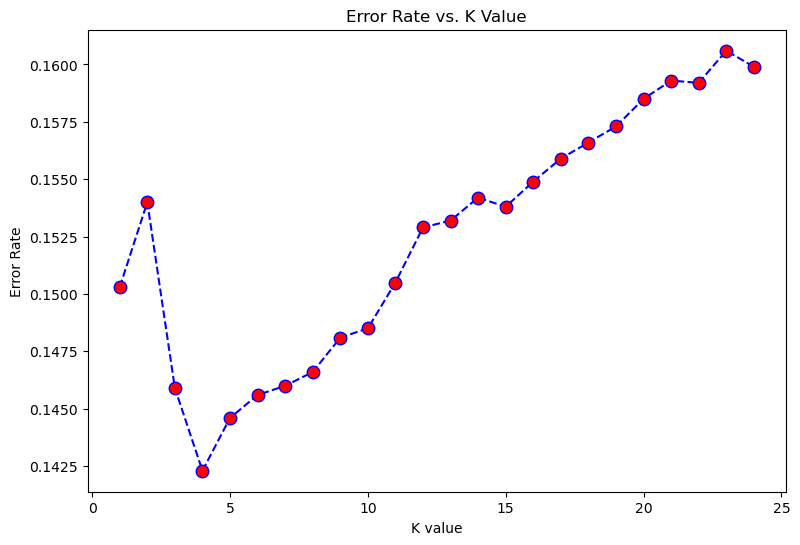

In [29]:
#Visualizing the elbow curve
plt.figure(figsize=(9,6)) 
plt.plot(range(1,25),error_rate,color ='blue', linestyle ='dashed', marker ='o', markerfacecolor ='red', markersize =9)
plt.title('Error Rate vs. K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

From the above plot we can say that k = 4 is giving the lowest error rate. So, we can consider 4 nearest neighbors.

In [30]:
# Let's cross-check the value of k using Grid Search Cross Validation if it's same as elbow curve or not

KNN_model = KNeighborsClassifier() # Calling KNN model
param_grid = {'n_neighbors': [3,4,5,6,7,8,9]}
cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
grid = GridSearchCV(KNN_model, param_grid, cv = cv, scoring='accuracy',return_train_score=True)

In [31]:
gcv = grid.fit(X_train1, y_train) # training the model with the train dataset

In [32]:
print("Best Parameter: {}".format(gcv.best_params_))
print("Best Cross Validation Score: {}".format(gcv.best_score_))

Best Parameter: {'n_neighbors': 4}
Best Cross Validation Score: 0.8570166666666665


Here, we can see that both elbow curve and gridsearch both have given k as 4 as the best value for the KNN model so, we will train our model using the same.

In [33]:
model4 = gcv.best_estimator_.fit(X_train1, y_train) # training the model with the train dataset
y_test_hat_4 = model4.predict(X_test1)
y_test_hat_4

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

### Model 5 : Stochastic Gradient Descent Model


In [34]:
model5 = SGDClassifier(random_state=0, learning_rate = 'constant', eta0 = 0.001) # Calling SGD model with constant learning rate
model5.fit(X_train1, y_train) # training the model with the train dataset
y_test_hat_5=model5.predict(X_test1)
y_test_hat_5

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

### Model 6 : Gaussian Naive Bayes


In [35]:
model6 = GaussianNB() # Calling Gussian Naive bayes model
model6.fit(X_train1,y_train) # training the model with the train dataset
y_test_hat_6 = model6.predict(X_test1)
y_test_hat_6

array([7, 4, 1, ..., 3, 1, 7], dtype=uint8)

### Model 7 : Extreme Gradient Booting

In [36]:
#Creating an object for Extreme gradient boosting
model7 = XGBClassifier(n_estimators = 10, random_state = 42, objective="reg:linear") #Calling XGboost model
model7.fit(X_train1, y_train) #fitting and training the model with traning values
y_test_hat_7 = model7.predict(X_test1)
y_test_hat_7

C:\Users\srusti\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:44:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

# Evaluating models

### Model 1 : Logistic Regression Model

- The ratio of correctly identified instances to the total number of cases being evaluated can also be used to determine accuracy score.

In [37]:
accuracy_score(y_test, y_test_hat_1, normalize = True) * 100 # Let's check the accuracy of the model1

84.42

- The accuracy of predictions made by a classification algorithm is evaluated using a classification report. How many of the forecasts came true and how many didn't. More specifically, the metrics of a classification report are predicted using True Positives, False Positives, True Negatives, and False Negatives, as illustrated below.

In [38]:
print(classification_report(y_test, y_test_hat_1)) # Let's check the classification report of model1

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      1000
           1       0.97      0.96      0.96      1000
           2       0.73      0.74      0.73      1000
           3       0.83      0.86      0.85      1000
           4       0.74      0.76      0.75      1000
           5       0.94      0.92      0.93      1000
           6       0.63      0.57      0.60      1000
           7       0.91      0.94      0.92      1000
           8       0.93      0.94      0.93      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



- A confusion matrix is a table that is used to define the performance of a classification algorithm.

In [39]:
confusion_matrix(y_test, y_test_hat_1) # Let's check confusion matrix for model1

array([[806,   2,  11,  53,   4,   2, 111,   0,  11,   0],
       [  4, 958,   3,  25,   4,   0,   3,   1,   2,   0],
       [ 25,   3, 739,  10, 124,   0,  86,   1,  12,   0],
       [ 24,  17,  18, 861,  30,   0,  39,   0,  11,   0],
       [  0,   2, 115,  36, 763,   0,  77,   0,   7,   0],
       [  0,   0,   0,   1,   0, 922,   0,  48,   7,  22],
       [143,   2, 123,  38, 100,   0, 571,   0,  23,   0],
       [  0,   0,   0,   0,   0,  35,   0, 939,   0,  26],
       [  7,   1,   7,  13,   5,   6,  21,   5, 935,   0],
       [  0,   1,   0,   0,   0,  12,   1,  38,   0, 948]], dtype=int64)

- The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives.

In [40]:
precision_score(y_test, y_test_hat_1, average = None) * 100 # Let's check precision score for model1

array([79.88107037, 97.16024341, 72.73622047, 83.02796528, 74.0776699 ,
       94.37052201, 62.81628163, 90.98837209, 92.75793651, 95.18072289])

- The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives.

In [41]:
recall_score(y_test, y_test_hat_1, average = None) * 100 # Let's check recall score for model1

array([80.6, 95.8, 73.9, 86.1, 76.3, 92.2, 57.1, 93.9, 93.5, 94.8])

- The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. 

In [42]:
f1_score(y_test, y_test_hat_1, average = None) * 100 # Let's check f1 score for model1

array([80.23892484, 96.47532729, 73.31349206, 84.53608247, 75.17241379,
       93.27263531, 59.82189628, 92.42125984, 93.12749004, 94.98997996])

#### Here, we can see that the accuracy of the logistc regression model is 84.42%. And class_name wise accuracy, precision, recall and f1 values are same as of classification report. And has the highest scores if we have to predict only 1 → Trouser. 

### Model 2 : Decision Tree Model


In [43]:
accuracy_score(y_test, y_test_hat_2, normalize = True) * 100 #Let's check the accuracy of the model2

80.01

In [44]:
print(classification_report(y_test, y_test_hat_2)) # Let's check the classification report of model2

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1000
           1       0.95      0.95      0.95      1000
           2       0.69      0.68      0.68      1000
           3       0.81      0.79      0.80      1000
           4       0.67      0.68      0.67      1000
           5       0.91      0.89      0.90      1000
           6       0.53      0.56      0.54      1000
           7       0.86      0.89      0.87      1000
           8       0.92      0.93      0.92      1000
           9       0.92      0.91      0.91      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



In [45]:
confusion_matrix(y_test, y_test_hat_2) # Let's check confusion matrix for model2

array([[736,   3,  20,  47,  11,   2, 169,   0,  11,   1],
       [  9, 947,   1,  29,   4,   1,   7,   0,   2,   0],
       [ 16,   1, 679,  12, 141,   0, 143,   0,   7,   1],
       [ 48,  27,  11, 789,  58,   0,  56,   0,   9,   2],
       [  8,   3, 151,  43, 675,   0, 113,   0,   7,   0],
       [  1,   2,   0,   1,   1, 894,   0,  69,  10,  22],
       [140,   8, 118,  38, 106,   1, 560,   0,  27,   2],
       [  0,   0,   0,   0,   0,  59,   0, 885,   5,  51],
       [  5,   2,  10,   9,   7,   9,  14,   9, 930,   5],
       [  0,   1,   1,   1,   0,  19,   0,  68,   4, 906]], dtype=int64)

In [46]:
precision_score(y_test, y_test_hat_2, average = None) * 100 # Let's check precision score for model2

array([76.4278297 , 95.27162978, 68.51664985, 81.42414861, 67.29810568,
       90.76142132, 52.7306968 , 85.83899127, 91.8972332 , 91.51515152])

In [47]:
recall_score(y_test, y_test_hat_2, average = None) * 100 # Let's check recall score for model2

array([73.6, 94.7, 67.9, 78.9, 67.5, 89.4, 56. , 88.5, 93. , 90.6])

In [48]:
f1_score(y_test, y_test_hat_2, average = None) * 100 # Let's check f1 score for model2

array([74.98726439, 94.98495486, 68.20693119, 80.14220416, 67.39890165,
       90.07556675, 54.31619787, 87.14918759, 92.44532803, 91.05527638])

#### Here, we can say that the accuracy of the decision tree model is 80%. And class_name wise accuracy, precision, recall and f1 values are same as of classification report. And has the highest scores if we have to predict only 1 → Trouser. 

### Model 3 : Random Forest Model


In [49]:
accuracy_score(y_test, y_test_hat_3, normalize = True) * 100 #Let's check the accuracy of the model3

87.94

In [50]:
print(classification_report(y_test, y_test_hat_3)) # Let's check the classification report of model3

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1000
           1       0.99      0.96      0.98      1000
           2       0.77      0.81      0.79      1000
           3       0.87      0.91      0.89      1000
           4       0.78      0.81      0.80      1000
           5       0.98      0.96      0.97      1000
           6       0.72      0.60      0.66      1000
           7       0.93      0.95      0.94      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [51]:
confusion_matrix(y_test, y_test_hat_3) # Let's check confusion matrix for model3

array([[861,   0,  10,  32,   4,   1,  81,   0,  11,   0],
       [  3, 960,   3,  24,   4,   0,   5,   0,   1,   0],
       [ 13,   0, 808,   9, 111,   0,  54,   0,   5,   0],
       [ 17,   2,   8, 911,  27,   0,  32,   0,   2,   1],
       [  1,   1,  93,  36, 814,   0,  52,   0,   3,   0],
       [  0,   0,   0,   1,   0, 961,   0,  27,   1,  10],
       [152,   1, 121,  27,  82,   0, 601,   0,  16,   0],
       [  0,   0,   0,   0,   0,  12,   0, 955,   0,  33],
       [  1,   2,   4,   2,   5,   2,   5,   3, 975,   1],
       [  0,   0,   0,   0,   0,   7,   1,  42,   2, 948]], dtype=int64)

In [52]:
precision_score(y_test, y_test_hat_3, average = None) * 100 # Let's check precision score for model3

array([82.15648855, 99.37888199, 77.17287488, 87.42802303, 77.74594078,
       97.7619532 , 72.32250301, 92.98928919, 95.96456693, 95.46827795])

In [53]:
recall_score(y_test, y_test_hat_3, average = None) * 100 # Let's check recall score for model3

array([86.1, 96. , 80.8, 91.1, 81.4, 96.1, 60.1, 95.5, 97.5, 94.8])

In [54]:
f1_score(y_test, y_test_hat_3, average = None) * 100 # Let's check f1 score for model3

array([84.08203125, 97.6602238 , 78.94479726, 89.22624878, 79.53102101,
       96.92385275, 65.64718733, 94.22792304, 96.72619048, 95.13296538])

#### Here, we can say that the accuracy of the random forest model is 87.94%. And class_name wise accuracy, precision, recall and f1 values are same as of classification report. And has the highest scores if we have to predict only 1 → Trouser, 5 → Sandal, 8 → Bag and 9 → Ankle boot.

### Model 4 : KNN Model with Grid Search Cross Validation 


In [55]:
accuracy_score(y_test, y_test_hat_4, normalize = True) * 100 #Let's check the accuracy of the model4

85.77

In [56]:
print(classification_report(y_test, y_test_hat_4)) # Let's check the classification report of model4

              precision    recall  f1-score   support

           0       0.75      0.89      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.71      0.83      0.76      1000
           3       0.90      0.87      0.89      1000
           4       0.80      0.74      0.77      1000
           5       0.99      0.85      0.92      1000
           6       0.68      0.55      0.60      1000
           7       0.88      0.97      0.93      1000
           8       0.98      0.95      0.97      1000
           9       0.92      0.96      0.94      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [57]:
confusion_matrix(y_test, y_test_hat_4) # Let's check confusion matrix for model4

array([[886,   1,  20,  14,   3,   1,  72,   1,   2,   0],
       [  8, 971,   3,  10,   4,   0,   3,   0,   1,   0],
       [ 27,   2, 831,  11,  69,   0,  60,   0,   0,   0],
       [ 48,   7,  15, 868,  25,   0,  34,   0,   3,   0],
       [  4,   1, 151,  32, 743,   0,  67,   0,   2,   0],
       [  2,   0,   0,   0,   0, 855,   4,  77,   0,  62],
       [198,   2, 143,  22,  79,   0, 545,   0,  11,   0],
       [  0,   0,   0,   0,   0,   4,   0, 971,   0,  25],
       [  3,   0,  13,   3,   5,   0,  18,   7, 951,   0],
       [  0,   0,   0,   0,   0,   1,   1,  42,   0, 956]], dtype=int64)

In [58]:
precision_score(y_test, y_test_hat_4, average = None) * 100 # Let's check precision score for model4

array([75.34013605, 98.67886179, 70.66326531, 90.41666667, 80.06465517,
       99.30313589, 67.78606965, 88.43351548, 98.04123711, 91.65867689])

In [59]:
recall_score(y_test, y_test_hat_4, average = None) * 100 # Let's check recall score for model4

array([88.6, 97.1, 83.1, 86.8, 74.3, 85.5, 54.5, 97.1, 95.1, 95.6])

In [60]:
f1_score(y_test, y_test_hat_4, average = None) * 100 # Let's check f1 score for model4

array([81.43382353, 97.88306452, 76.37867647, 88.57142857, 77.0746888 ,
       91.88608275, 60.42128603, 92.564347  , 96.54822335, 93.58786099])

#### Here, we can say that the accuracy of the KNN model is 85.77%.  And class_name wise accuracy, precision, recall and f1 values are same as of classification report. And has the highest scores if we have to predict only 1 → Trouser, and 8 → Bag.

### Model 5 : Stochastic Gradient Descent Model


In [61]:
accuracy_score(y_test, y_test_hat_5, normalize = True) * 100  #Let's check the accuracy of the model5

83.91

In [62]:
print(classification_report(y_test, y_test_hat_5)) # Let's check the classification report of model5

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1000
           1       0.95      0.96      0.96      1000
           2       0.75      0.72      0.73      1000
           3       0.79      0.88      0.83      1000
           4       0.69      0.81      0.75      1000
           5       0.95      0.91      0.93      1000
           6       0.66      0.48      0.56      1000
           7       0.91      0.92      0.92      1000
           8       0.93      0.95      0.94      1000
           9       0.92      0.96      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [63]:
confusion_matrix(y_test, y_test_hat_5) # Let's check confusion matrix for model5

array([[800,   6,  15,  63,  10,   3,  87,   0,  16,   0],
       [  2, 962,   1,  27,   6,   0,   0,   0,   2,   0],
       [ 14,   7, 718,  16, 169,   0,  67,   1,   8,   0],
       [ 19,  22,  10, 883,  36,   0,  26,   0,   4,   0],
       [  0,   7,  77,  40, 811,   0,  57,   1,   7,   0],
       [  0,   0,   0,   2,   0, 910,   1,  48,   5,  34],
       [135,   6, 134,  72, 139,   1, 481,   0,  32,   0],
       [  0,   0,   0,   0,   0,  31,   0, 921,   1,  47],
       [  3,   1,   5,  13,   5,   6,  14,   4, 949,   0],
       [  0,   0,   0,   1,   0,   6,   0,  36,   1, 956]], dtype=int64)

In [64]:
precision_score(y_test, y_test_hat_5, average = None) * 100 # Let's check precision score for model5

array([82.21993834, 95.15331355, 74.79166667, 79.05102954, 68.96258503,
       95.08881923, 65.6207367 , 91.09792285, 92.58536585, 92.18900675])

In [65]:
recall_score(y_test, y_test_hat_5, average = None) * 100 # Let's check recall score for model5

array([80. , 96.2, 71.8, 88.3, 81.1, 91. , 48.1, 92.1, 94.9, 95.6])

In [66]:
f1_score(y_test, y_test_hat_5, average = None) * 100 # Let's check f1 score for model5

array([81.09477952, 95.67379413, 73.26530612, 83.41993387, 74.54044118,
       92.99948901, 55.51067513, 91.59622079, 93.72839506, 93.86352479])

#### Here, we can say that the accuracy of the Stochastic Gradient Descent model is 83.91%. And class_name wise accuracy, precision, recall and f1 values are same as of classification report. And has the highest scores if we have to predict only 1 → Trouser.

### Model 6 : Gaussian Naive Bayes


In [67]:
accuracy_score(y_test, y_test_hat_6, normalize = True) * 100 #Let's check the accuracy of the model6

58.56

In [68]:
print(classification_report(y_test, y_test_hat_6)) # Let's check the classification report of model6

              precision    recall  f1-score   support

           0       0.81      0.59      0.68      1000
           1       0.64      0.94      0.76      1000
           2       0.59      0.32      0.42      1000
           3       0.44      0.55      0.49      1000
           4       0.38      0.78      0.51      1000
           5       0.93      0.28      0.43      1000
           6       0.32      0.04      0.07      1000
           7       0.51      0.99      0.67      1000
           8       0.83      0.71      0.77      1000
           9       0.91      0.67      0.77      1000

    accuracy                           0.59     10000
   macro avg       0.64      0.59      0.56     10000
weighted avg       0.64      0.59      0.56     10000



In [69]:
confusion_matrix(y_test, y_test_hat_6) # Let's check confusion matrix for model6

array([[586,  64,  29, 162, 110,   0,  20,   0,  29,   0],
       [  1, 939,  14,  36,   7,   0,   1,   0,   2,   0],
       [  7,  14, 324,  65, 545,   0,  23,   0,  22,   0],
       [  9, 387,   6, 545,  43,   0,   4,   0,   6,   0],
       [  0,  34,  44, 131, 779,   0,   4,   0,   8,   0],
       [  0,   0,   1,   1,   0, 278,   3, 660,   5,  52],
       [117,  34, 112, 200, 435,   0,  40,   0,  62,   0],
       [  0,   0,   0,   0,   0,   3,   0, 988,   0,   9],
       [  0,   2,  19,  85, 149,   3,  27,   4, 710,   1],
       [  0,   0,   1,   1,   0,  16,   3, 304,   8, 667]], dtype=int64)

In [70]:
precision_score(y_test, y_test_hat_6, average = None) * 100 # Let's check precision score for model6

array([81.38888889, 63.70420624, 58.90909091, 44.45350734, 37.66924565,
       92.66666667, 32.        , 50.51124744, 83.33333333, 91.4951989 ])

In [71]:
recall_score(y_test, y_test_hat_6, average = None) * 100 # Let's check recall score for model6

array([58.6, 93.9, 32.4, 54.5, 77.9, 27.8,  4. , 98.8, 71. , 66.7])

In [72]:
f1_score(y_test, y_test_hat_6, average = None) * 100 # Let's check f1 score for model6

array([68.13953488, 75.90945837, 41.80645161, 48.96675651, 50.78226858,
       42.76923077,  7.11111111, 66.84709066, 76.67386609, 77.15442452])

#### Here, we can say that the accuracy of the gaussian Naive Bayes model is 58.56%.  And class_name wise accuracy, precision, recall and f1 values are same as of classification report. 

### Model 7 : Extreme Gradient Boosting

In [73]:
accuracy_score(y_test, y_test_hat_7, normalize = True) * 100 #Let's check the accuracy of the model7

85.41

In [74]:
print(classification_report(y_test, y_test_hat_7)) # Let's check the classification report of model7

              precision    recall  f1-score   support

           0       0.80      0.83      0.81      1000
           1       0.99      0.96      0.97      1000
           2       0.73      0.77      0.75      1000
           3       0.84      0.89      0.86      1000
           4       0.72      0.78      0.75      1000
           5       0.98      0.93      0.96      1000
           6       0.67      0.55      0.60      1000
           7       0.91      0.94      0.92      1000
           8       0.96      0.96      0.96      1000
           9       0.93      0.94      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [75]:
confusion_matrix(y_test, y_test_hat_7) # Let's check confusion matrix for model7

array([[832,   0,  14,  43,   7,   1,  91,   0,  12,   0],
       [  3, 957,   3,  30,   3,   0,   2,   0,   2,   0],
       [ 14,   0, 769,  10, 141,   0,  61,   0,   5,   0],
       [ 29,   5,   9, 885,  35,   0,  34,   0,   3,   0],
       [  1,   0, 116,  37, 777,   0,  66,   0,   3,   0],
       [  0,   0,   1,   0,   0, 934,   0,  44,   2,  19],
       [165,   2, 133,  34, 104,   2, 547,   0,  13,   0],
       [  0,   0,   0,   0,   0,   7,   0, 940,   0,  53],
       [  0,   1,   5,   8,   6,   4,  13,   3, 959,   1],
       [  0,   0,   0,   1,   0,   8,   1,  48,   1, 941]], dtype=int64)

In [76]:
precision_score(y_test, y_test_hat_7, average = None) * 100 # Let's check precision score for model7

array([79.69348659, 99.17098446, 73.23809524, 84.44656489, 72.4137931 ,
       97.69874477, 67.11656442, 90.82125604, 95.9       , 92.80078895])

In [77]:
recall_score(y_test, y_test_hat_7, average = None) * 100 # Let's check recall score for model7

array([83.2, 95.7, 76.9, 88.5, 77.7, 93.4, 54.7, 94. , 95.9, 94.1])

In [78]:
f1_score(y_test, y_test_hat_7, average = None) * 100 # Let's check f1 score for model7

array([81.40900196, 97.40458015, 75.02439024, 86.42578125, 74.96382055,
       95.50102249, 60.27548209, 92.38329238, 95.9       , 93.44587885])

#### Here, we can say that the accuracy of the Extreme Gradient Boosting model is 85.41%.  And class_name wise accuracy, precision, recall and f1 values are same as of classification report. And has the highest scores if we have to predict only 1 → Trouser, and 8 → Bag.

## Conclusion of evaluation of models:

#### After checking the accuracy, precision, recall, f1 score and confusion matrix of all the models we can say that the random forest is performing the best among all the model with 87.94% accuracy. So, we can consider the same for our next step that is predicting our own images.

# Use the best model to predict your own fashion pieces.

#### Let's take 12 images from our own collection and check wether the random forest is able to predict the correct label or not.

- 1st Image

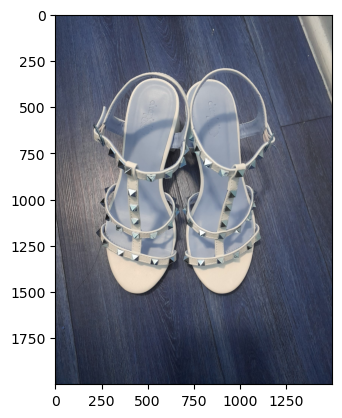

In [79]:
img_path1 = 'Image_Project.jpeg' # Let's load the image
image1 = cv2.imread(img_path1) # reading the image using cv2 package
plt.imshow(image1) # Visualize the image
plt.show()

In [80]:
image1.shape # Checking the shape of image 

(2000, 1500, 3)

In [81]:
image1 = cv2.resize(image1,(28,28)) # resizing the image same as the training image size
image1.shape

(28, 28, 3)

In [82]:
image1 = np.reshape(image1, (-1,28*28)) # reshaping the shape of the image as the model can take the same image size that is of training data
image1.shape

(3, 784)

In [83]:
image1 = image1/255 # Normalize the image to keep same range
image1

array([[0.18039216, 0.22352941, 0.32941176, ..., 0.52156863, 0.60784314,
        0.64313725],
       [0.67843137, 0.72941176, 0.64313725, ..., 0.63529412, 0.68627451,
        0.69411765],
       [0.65490196, 0.90980392, 0.85098039, ..., 0.14117647, 0.18039216,
        0.2745098 ]])

In [84]:
ans1 = model3.predict(image1) # predicting using random forest model
print(class_names[ans1[0]])

Bag


- 2nd Image

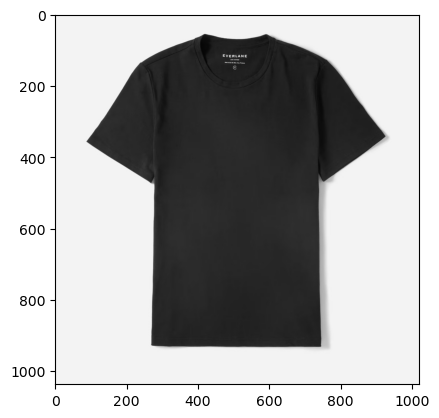

In [85]:
img_path2 = 'image2.jpg'
image2 = cv2.imread(img_path2)
plt.imshow(image2)
plt.show()

In [86]:
image2.shape

(1037, 1020, 3)

In [87]:
image2 = cv2.resize(image2,(28,28))
image2.shape

(28, 28, 3)

In [88]:
image2 = np.reshape(image2, (-1,28*28))
image2.shape

(3, 784)

In [89]:
image2 = image2/255
image2

array([[0.95294118, 0.95294118, 0.95294118, ..., 0.11764706, 0.11764706,
        0.14509804],
       [0.14509804, 0.14509804, 0.15294118, ..., 0.15686275, 0.16078431,
        0.16078431],
       [0.16078431, 0.16862745, 0.16862745, ..., 0.95294118, 0.95294118,
        0.95294118]])

In [90]:
ans2 = model3.predict(image2)
print(class_names[ans2[0]])

Shirt


- 3rd Image

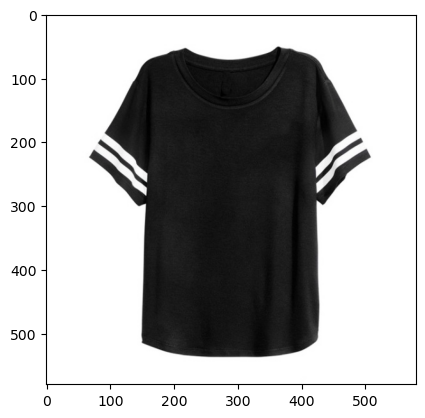

In [91]:
img_path3 = 'image3.jpg'
image3 = cv2.imread(img_path3)
plt.imshow(image3)
plt.show()

In [92]:
image3.shape

(580, 580, 3)

In [93]:
image3 = cv2.resize(image3,(28,28))
image3.shape

(28, 28, 3)

In [94]:
image3 = np.reshape(image3, (-1,28*28))
image3.shape

(3, 784)

In [95]:
image3 = image3/255
image3

array([[1.        , 1.        , 1.        , ..., 0.11372549, 0.11372549,
        0.11372549],
       [0.11372549, 0.11372549, 0.09803922, ..., 0.10588235, 0.08627451,
        0.08627451],
       [0.08627451, 0.11372549, 0.11372549, ..., 1.        , 1.        ,
        1.        ]])

In [96]:
ans3 = model3.predict(image3)
print(class_names[ans3[0]])

Shirt


- 4th Image

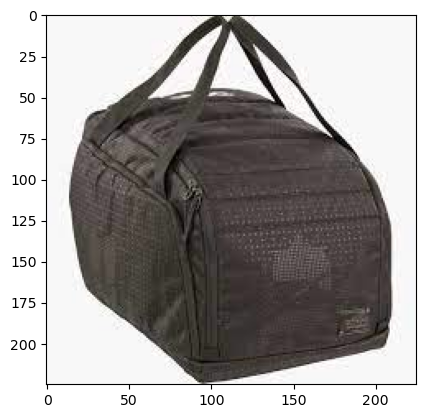

In [97]:
img_path4 = 'image14.jpeg'
image4 = cv2.imread(img_path4)
plt.imshow(image4)
plt.show()

In [98]:
image4.shape

(225, 225, 3)

In [99]:
image4 = cv2.resize(image4,(28,28))
image4.shape

(28, 28, 3)

In [100]:
image4 = np.reshape(image4, (-1,28*28))
image4.shape

(3, 784)

In [101]:
image4 = image4/255
image4

array([[0.97254902, 0.97254902, 0.97254902, ..., 0.36862745, 0.36862745,
        0.31372549],
       [0.2745098 , 0.2745098 , 0.21568627, ..., 0.32156863, 0.38431373,
        0.34509804],
       [0.34509804, 0.36078431, 0.32156863, ..., 0.97254902, 0.97254902,
        0.97254902]])

In [102]:
ans4 = model3.predict(image4)
print(class_names[ans4[0]])

Shirt


- 5th Image

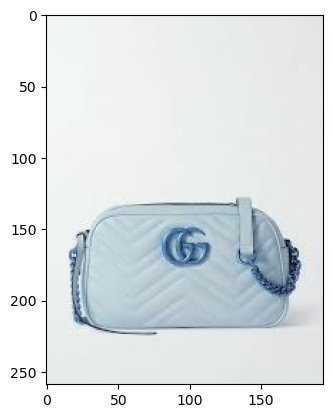

In [103]:
img_path5 = 'image5.jpeg'
image5 = cv2.imread(img_path5)
plt.imshow(image5)
plt.show()

In [104]:
image5.shape

(259, 194, 3)

In [105]:
image5 = cv2.resize(image5,(28,28))
image5.shape

(28, 28, 3)

In [106]:
image5 = np.reshape(image5, (-1,28*28))
image5.shape

(3, 784)

In [107]:
image5 = image5/255
image5

array([[0.94117647, 0.95686275, 0.96078431, ..., 0.94901961, 0.95294118,
        0.94117647],
       [0.94901961, 0.95294118, 0.9372549 , ..., 0.81960784, 0.70196078,
        0.77254902],
       [0.82352941, 0.41568627, 0.5372549 , ..., 0.88235294, 0.89019608,
        0.89411765]])

In [108]:
ans5 = model3.predict(image5)
print(class_names[ans5[0]])

Bag


- 6th Image

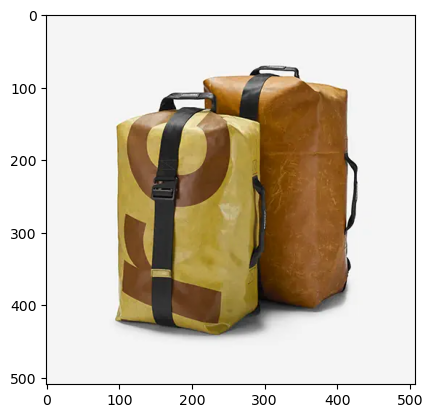

In [109]:
img_path6 = 'image6.webp'
image6 = cv2.imread(img_path6)
plt.imshow(image6)
plt.show()

In [110]:
image6.shape

(509, 508, 3)

In [111]:
image6 = cv2.resize(image6,(28,28))
image6.shape

(28, 28, 3)

In [112]:
image6 = np.reshape(image6, (-1,28*28))
image6.shape

(3, 784)

In [113]:
image6 = image6/255
image6

array([[0.96078431, 0.96078431, 0.96078431, ..., 0.66666667, 0.37647059,
        0.14509804],
       [0.14509804, 0.14509804, 0.81176471, ..., 0.00784314, 0.50196078,
        0.29803922],
       [0.08627451, 0.56470588, 0.35294118, ..., 0.96078431, 0.96078431,
        0.96078431]])

In [114]:
ans6 = model3.predict(image6)
print(class_names[ans6[0]])

Bag


- 7th Image

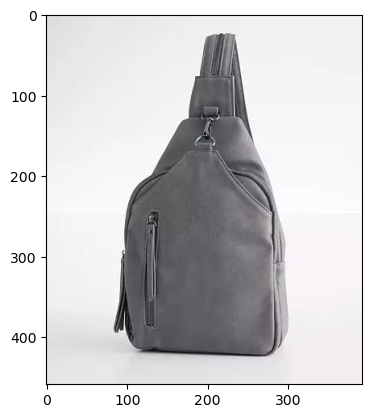

In [115]:
img_path7 = 'image7.webp'
image7 = cv2.imread(img_path7)
plt.imshow(image7)
plt.show()

In [116]:
image7.shape

(459, 392, 3)

In [117]:
image7 = cv2.resize(image7,(28,28))
image7.shape

(28, 28, 3)

In [118]:
image7 = np.reshape(image7, (-1,28*28))
image7.shape

(3, 784)

In [119]:
image7 = image7/255
image7

array([[0.86666667, 0.86666667, 0.86666667, ..., 0.96078431, 0.96078431,
        0.96470588],
       [0.96470588, 0.96470588, 0.96470588, ..., 0.50196078, 0.50196078,
        0.48627451],
       [0.50588235, 0.50980392, 0.49411765, ..., 0.94509804, 0.92941176,
        0.94117647]])

In [120]:
ans7 = model3.predict(image7)
print(class_names[ans7[0]])

Bag


- 8th Image

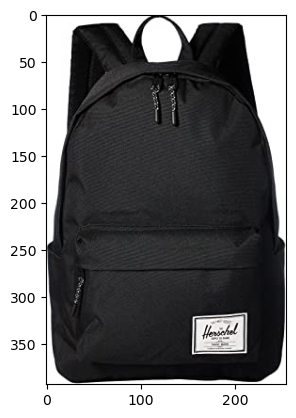

In [121]:
img_path8 = 'image8.jpg'
image8 = cv2.imread(img_path8)
plt.imshow(image8)
plt.show()

In [122]:
image8.shape

(393, 255, 3)

In [123]:
image8 = cv2.resize(image8,(28,28))
image8.shape

(28, 28, 3)

In [124]:
image8 = np.reshape(image8, (-1,28*28))
image8.shape

(3, 784)

In [125]:
image8 = image8/255
image8

array([[1.        , 1.        , 1.        , ..., 0.20392157, 0.21176471,
        0.21176471],
       [0.20784314, 0.21568627, 0.21176471, ..., 0.18823529, 0.20784314,
        0.20392157],
       [0.21176471, 0.16078431, 0.16862745, ..., 1.        , 1.        ,
        1.        ]])

In [126]:
ans8 = model3.predict(image8)
print(class_names[ans8[1]])

Shirt


- 9th Image

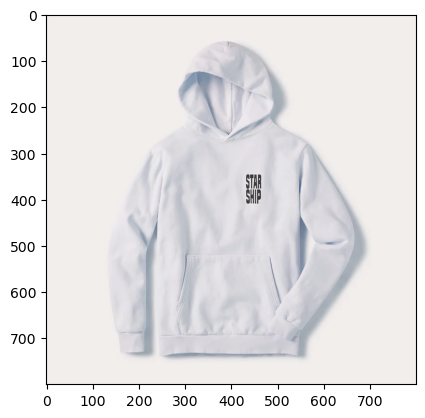

In [127]:
img_path9 = 'image10.webp'
image9 = cv2.imread(img_path9)
plt.imshow(image9)
plt.show()

In [128]:
image9.shape

(800, 800, 3)

In [129]:
image9 = cv2.resize(image9,(28,28))
image9.shape

(28, 28, 3)

In [130]:
image9 = np.reshape(image9, (-1,28*28))
image9.shape

(3, 784)

In [131]:
image9 = image9/255
image9

array([[0.94901961, 0.93333333, 0.91764706, ..., 0.93333333, 0.91764706,
        0.87843137],
       [0.87058824, 0.89019608, 0.87843137, ..., 0.8745098 , 0.80392157,
        0.80392157],
       [0.83137255, 0.56078431, 0.60784314, ..., 0.94901961, 0.93333333,
        0.9254902 ]])

In [132]:
ans9 = model3.predict(image9)
print(class_names[ans9[1]])

Bag


- 10th Image

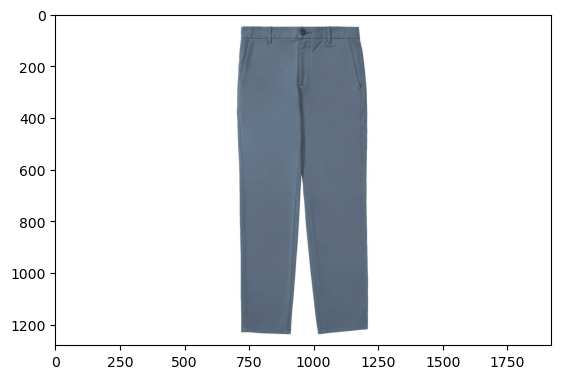

In [133]:
img_path10= 'image11.webp'
image10 = cv2.imread(img_path10)
plt.imshow(image10)
plt.show()

In [134]:
image10.shape

(1280, 1920, 3)

In [135]:
image10 = cv2.resize(image10,(28,28))
image10.shape

(28, 28, 3)

In [136]:
image10 = np.reshape(image10, (-1,28*28))
image10.shape

(3, 784)

In [137]:
image10 = image10/255
image10

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 0.41960784, ..., 0.50196078, 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [138]:
ans10 = model3.predict(image10)
print(class_names[ans10[0]])

Shirt


- 11th Image

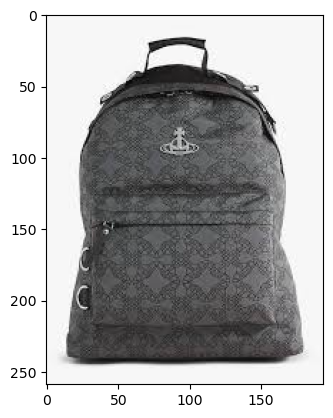

In [139]:
img_path11 = 'image12.jpeg'
image11 = cv2.imread(img_path11)
plt.imshow(image11)
plt.show()

In [140]:
image11.shape

(259, 194, 3)

In [141]:
image11 = cv2.resize(image11,(28,28))
image11.shape

(28, 28, 3)

In [142]:
image11 = np.reshape(image11, (-1,28*28))
image11.shape

(3, 784)

In [143]:
image11 = image11/255
image11

array([[0.96862745, 0.96862745, 0.96862745, ..., 0.30196078, 0.30196078,
        0.27843137],
       [0.28627451, 0.29019608, 0.33333333, ..., 0.41176471, 0.34901961,
        0.34509804],
       [0.35294118, 0.41176471, 0.40392157, ..., 0.96862745, 0.96862745,
        0.96862745]])

In [144]:
ans11 = model3.predict(image11)
print(class_names[ans11[1]])

Bag


- 12th Image

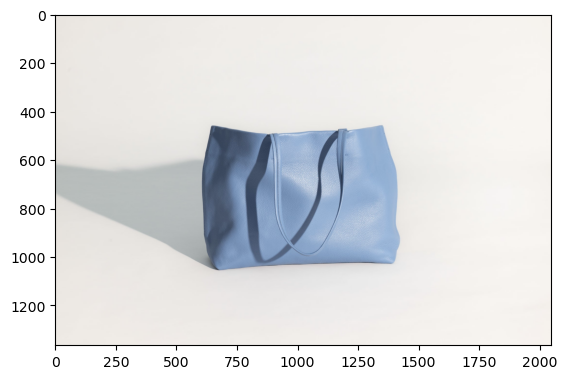

In [145]:
img_path12 = 'image13.jpg'
image12 = cv2.imread(img_path12)
plt.imshow(image12)
plt.show()

In [146]:
image12.shape

(1365, 2048, 3)

In [147]:
image12 = cv2.resize(image12,(28,28))
image12.shape

(28, 28, 3)

In [148]:
image12 = np.reshape(image12, (-1,28*28))
image12.shape

(3, 784)

In [149]:
image12 = image12/255
image12

array([[0.91372549, 0.89803922, 0.87843137, ..., 0.90980392, 0.89411765,
        0.89411765],
       [0.88627451, 0.87843137, 0.90588235, ..., 0.85098039, 0.63137255,
        0.7254902 ],
       [0.85098039, 0.91372549, 0.90196078, ..., 0.96470588, 0.94509804,
        0.93333333]])

In [150]:
ans12 = model3.predict(image12)
print(class_names[ans12[1]])

Bag


# Conclusion

In conclusion, we can say that after tuning hypyermeters for all the algorithms and trained 7 different tyes of models. Andout of all the models we found the model with 87.94% accuracy and it was Random Forest Classifier. Obviously, it is a tree based algorithm, good for large and multiclass datasets and can learn with different possible outcomes and reduces the chance of overfitting it is a great model to move forward. Further, using the same random forest model for predicting our own collection of images we can say that out of 12 it is predicting 5 correct images and for others the model is not performing good with the new data. To more improve we can add more training data or we can try more complex algorithms. I think this model is not performing good because all the images are not clear in training data, mostly all the images are black and white and mostly have same structures like 'T-shirt/top','Pullover','Dress','Coat','Shirt' are similar. So, the model is not able to differentiate between images. So, if we get more clear data the model can learn accuratly and distinguish between new images.